<h3>Simple linear regression lab</h3>


#### Aims 

* Do a simple linear regression on the Olympic 100~m data in Python
* Compare least square solution with gradient descent solution



#### Tasks 
* Download the data (‘olympic100m.txt’) from the Moodle page
* Plot Olympic year against winning time
* Plot the loss function in 1D and 2D
* Test the provided gradient descent code with your own code for loss and gradient
* Using the expressions derived provided in the supplement slides to compute $w_0$ and $w_1$. 
* Create a new plot that includes the data and the function defined by $w_0$ and $w_1$
* Make a prediction at 2012

#### Task 1: We start by loading the Olympic 100m men's data

In [2]:
import numpy as np 

data = np.loadtxt('../../week1/olympic100m.txt', delimiter=',') # load olympic data
x = data[:,0][:,None] # make x a column vector 
t = data[:,1][:,None] # make t a column vector 

#### Task 2: Plot the data
<p>It's useful to start with a plot</p>

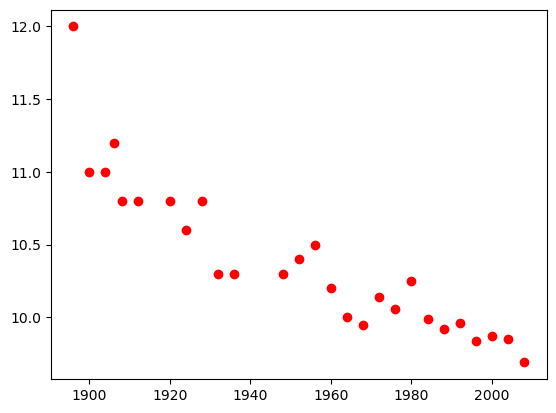

In [3]:
%matplotlib inline
import pylab as plt
plt.plot(x,t,'ro') # plot x and t with matplotlib's plot function: plt.plot

#### Task 3: Plot the averaged squared loss

Let's plot the loss function in 1D and 2D ($w_0$ and $w_1$) 

<p>Recall that the average squared loss was given by:</p>
$$ L = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$

$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

#### Task 3.1: Generate candidates of $w_0$ and $w_1$ for plotting

In [4]:
num_candidates = 100 # number of candidates
w0_candidates = np.linspace(start=-10,stop=82,num=num_candidates) # generate a numpy array of possible w0 values e.g. -10 to 82
w1_candidates = np.linspace(start=-0.037,stop=0.01,num=num_candidates) # generate a numpy array of possible w1 values e.g. -0.037 to 0.01

#### Task 3.2: Plot the average squared loss in 1D ($w_1$)

The average loss $L$ has both $w_0$ and $w_1$ as variables. In order to plot $L$, we have to fix one variable. For example, to plot $L$ vs $w_1$, we fix $w_0 = 36.4164559025$. See how the plot change when you change w0.

Text(0, 0.5, '$L$')

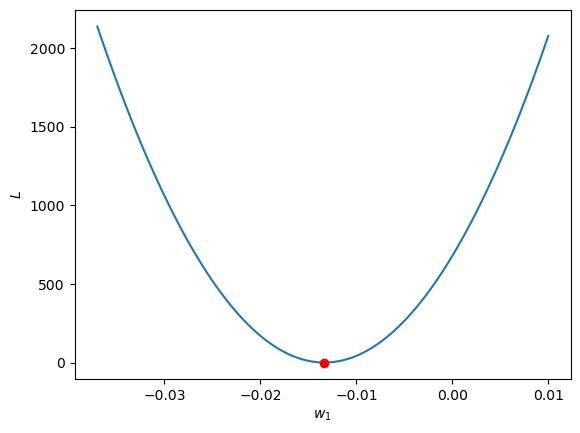

In [5]:
L = np.zeros(num_candidates) # preallocating a vector for L e.g. np.zeros 
for j in range(num_candidates): # For loop to evaluate L at every w1_candidates with w0 = 36.4164559025
    L[j] =  np.mean( (t-36.4164559025-w1_candidates[j]*x)**2 ) # You can use the "np.mean" function 
    
plt.plot(w1_candidates, L) # plot the resulting 
plt.plot(-0.013330885711,0.05, 'ro') 
plt.xlabel('$w_1$')
plt.ylabel('$L$')

#### Task 3.3: Plot the average squared loss in 1D ($w_0$)

Let's plot the average squared loss in $w_0$, this time fix $w_1 = -0.013330885711$. 

Text(0, 0.5, '$L$')

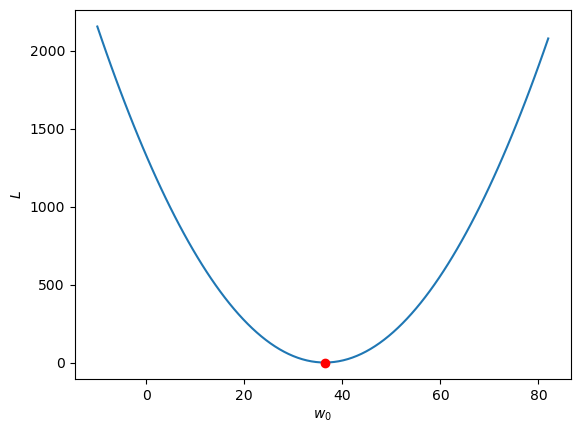

In [6]:
L = np.zeros(num_candidates) # preallocating a vector for L e.g. np.zeros 
for j in range(num_candidates): # For loop to evaluate L at every w0_candidates with w1 = −0.013330885711.
    L[j] =  np.mean( (t-w0_candidates[j]-(-0.013330885711)*x)**2 )  
    
plt.plot(w0_candidates, L)
plt.plot(36.4164559025,0.05, 'ro') 
plt.xlabel('$w_0$')
plt.ylabel('$L$')

#### Task 3.4: Plot the loss function using the contour plot

Now, we let $w_0$ and $w_1$ change at the same time, and make the contour plot

Text(0, 0.5, '$w_1$')

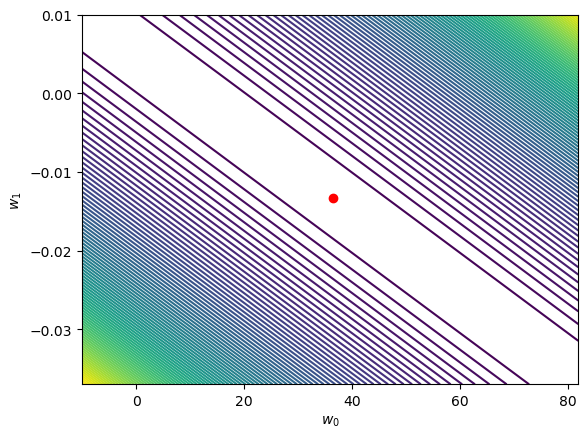

In [7]:
L = np.zeros( shape = (num_candidates,num_candidates) ) # Prelocate the loss. We are going to have num_candidates times num_candidates of them 

# Two nested for loops
for i in range(num_candidates): 
    for j in range(num_candidates):
        L[i,j] = np.mean( (t-w0_candidates[i]-w1_candidates[j]*x)**2 )


X, Y = np.meshgrid(w0_candidates, w1_candidates) # Make the x and y coordinates for contour plot
plt.contour(X, Y, L, 100)
plt.plot(36.4164559025, -0.013330885711,'ro') 
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

#### Task 4: Gradient Descent
Repeat until convergence {
$$ w_i = w_i - \alpha \frac{\partial L(w_0, w_1)}{\partial w_i} $$
}

It will be easier if we enclose the code to compute the gradient and the loss function in functions

#### Task 4.1 Define your own functions for the average squared loss and its gradient

You should derive the analytic formula for the gradient by hand -- do not use numerical derivatives (or autodiff or anything else!).

In [8]:
def loss(x, t, w0, w1): # define the loss function
    L = np.mean( (t-w0-w1*x)**2 ) # the average squared loss function
    return(L)

def gradient(x, t, w0, w1): # define the gradient function
    g0 = - np.mean(2*(t-w0-w1*x))  # partial derivative with respect to w0
    g1 = - np.mean(2*(t-w0-w1*x)*x) # partial derivative with respect to w1
    g = np.array([g0, g1])
    return(g)

#### Task 4.2: Run the following cell with your own functions for loss and gradient, it should only takes about a few seconds. If it gets too long, debug your functions


Our Olympic data turns out to be a quite challenging dataset for gradient descent. Try change value of `alpha` and `precision` in the following cell to see what happens.



In [9]:
alpha = 2e-7 # learning rate
precision = 1e-6 # convergence criterion
w_old = np.array([0., 1.]) # Initial old guess
w_new = np.zeros(2) # Actual starting point
w_list, l_list = [w_new], [loss(x, t, w_new[0], w_new[1] )] # two lists to store w0, w1 and loss
rate_modifier = np.array([1e6, 1]) # modified rate due the difference in scale between w0 and w1

while sum(abs(w_new - w_old)) > precision: # check convergence
    w_old = w_new # update parameters
    g = gradient(x, t, w_old[0], w_old[1]) # compute gradient at w_old
    w_new = w_old - alpha*rate_modifier * g # update parameters
    w_list.append(w_new) # store w
    l_list.append(loss(x, t, w_new[0], w_new[1])) # store loss
    
print("Minimum loss occurs at: ", w_new) 
print("Minimum loss is:", float(loss(x, t, w_new[0], w_new[1])) ) 
print("Gradient:", gradient(x, t, w_new[0], w_new[1]))
print("Number of steps:", len(l_list))

Minimum loss occurs at:  [ 3.64066442e+01 -1.33258614e-02]
Minimum loss is: 0.0503071414172712
Gradient: [-4.99683621e-06  2.55871730e-03]
Number of steps: 80093


#### Task 4.3: Plot the resulting fitted line and data

Text(0, 0.5, 'Winning time (s)')

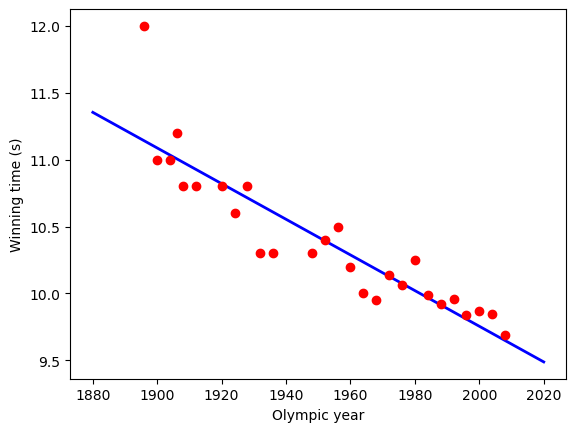

In [10]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
f_test = w_new[0] + w_new[1] * x_test
plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
plt.plot(x, t, "ro") # plot data
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

#### Task 4.4: Inspect gradient descent

Use the `w_list` and `l_list` to visualise the trace of $w_0$ and $w_1$ during gradient descent 

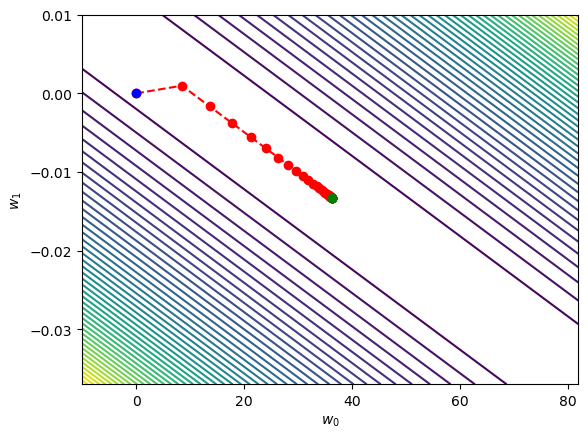

In [11]:
w_list = np.asanyarray(w_list) # convert the parameter list to a numpy array

plt.plot(w_list[::2000,0], w_list[::2000,1], "ro--") # only showing a subsample of the points
plt.plot(w_list[0,0], w_list[0,1], "bo") # plot the 1st point 
plt.plot(w_list[-1,0], w_list[-1,1], "go") # plot the final point 
plt.contour(X, Y, L, 50)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.savefig('wibl.pdf')

#### Task 4.5: Plot the learning curve: the trace of the average squared loss

Text(0, 0.5, '$L$')

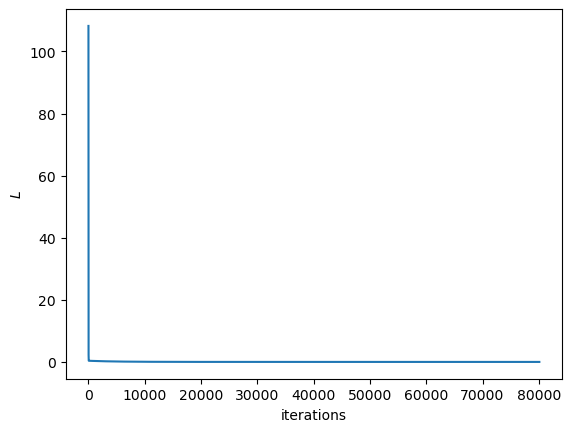

In [12]:
plt.plot(l_list) # plot l_list
plt.xlabel('iterations') 
plt.ylabel('$L$')

#### Task 4.6: Plot the learning curve: a zoom in look

Text(0, 0.5, '$L$')

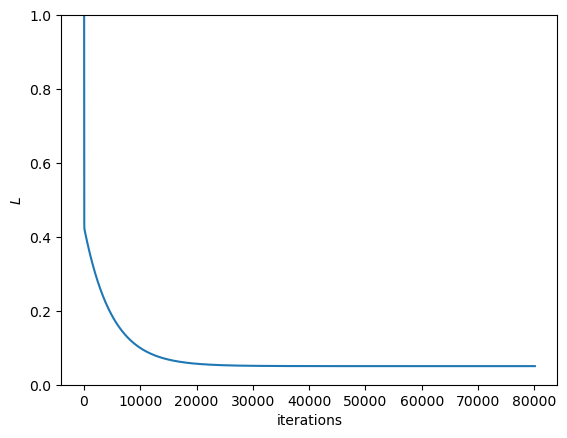

In [13]:
plt.plot(l_list) # zoom in 
plt.ylim((0,1))
plt.xlabel('iterations')
plt.ylabel('$L$')

#### Task 5: Least square solution

This

Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$, the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \overline{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

The derivation for this result is in the _supplementary slides from Ke Yuan_ available with the lecture notes on Moodle

#### Task 5.1: Write code to compute $\bar{x}$, $\bar{t}$, $\bar{x^2}$ and $\bar{xt}$

In [14]:
xbar = x.mean() 
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


#### Task 5.2: Write code to compute $w_0$ and $w_1$

In [15]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.41645590250286
-0.013330885710960602


#### Task 5.3: Plotting the fitted line and data

Text(0, 0.5, 'Winning time (s)')

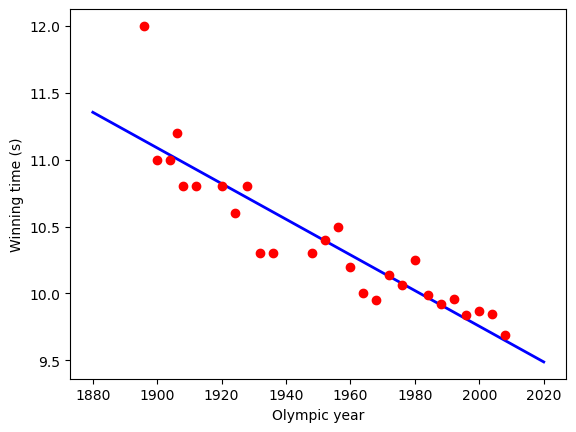

In [16]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
f_test = w0 + w1 * x_test # compute the corresponding target variables
plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
plt.plot(x, t, "ro") # plot data
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

#### Task 6: Predictions
We can now compute the prediction at 2012:

In [17]:
win_2012_least_square = w0+w1*2012 # make a prediction with the least square solution
win_2012_gradient_descent = w_new[0] + w_new[1] *2012 # make a prediction with the gradient descent solution
print(win_2012_least_square)
print(win_2012_gradient_descent)

9.59471385205013
9.595010948560653


#### Task 7: Optional task

Let's simulate some data using the following model

$$ t_n = w_0 + w_1 x_n + w_2  x_n^2$$

#### Task 7.1: Generate simulated data according to the model with $w_0 = 1$, $w_1 = 2.5$, and $w_2=3$

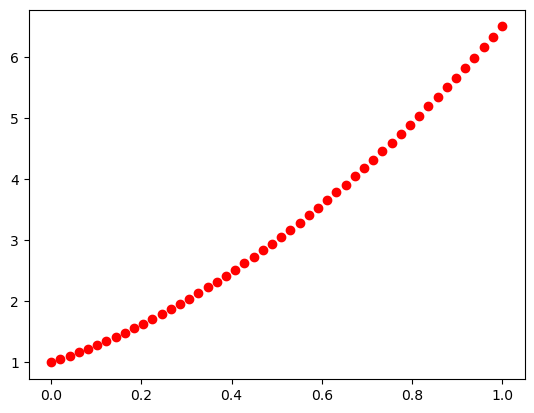

In [18]:
x = np.linspace(0,1,50) # generate x 
t = 1.0 + 2.5*x +3*x**2 # generate t
plt.plot(x,t, 'ro') # plot x and t

Now, assume that we didn't know $w_0=1$, $w_1=2.5$, and $w_2 = 3$. We only have the data, x and t

#### Task 7.2: Write your own functions for the average squared loss and gradient for this model

In [19]:
def new_loss(x, t, w0, w1, w2): # define average squared loss function
    L = np.mean( (t-w0-w1*x-w2*x**2)**2 )
    return(L)

def new_gradient(x, t, w0, w1, w2): # define the gradient 
   
    g0 = - np.mean(2*(t-w0-w1*x-w2*x**2)) # partial derivative with respect to w0
    g1 = - np.mean(2*(t-w0-w1*x-w2*x**2)*x) # partial derivative with respect to w1
    g2 = - np.mean(2*(t-w0-w1*x-w2*x**2)*x**2 ) # partial derivative with respect to w2
    g = np.array([g0, g1, g2])
    return(g)

#### Task 7.3: Run the gradient descent code 

In [20]:
alpha = 1e-2
precision = 1e-6
w_old = np.zeros(3)
w_new = np.array([-3, -0.1, -1])
w_list, l_list = [w_old], [loss(x, t, w_new[0], w_new[1] )]
rate_modifier = np.array([1, 1, 1])

while sum(abs(w_new - w_old)) > precision:
    w_old = w_new
    g = new_gradient(x, t, w_old[0], w_old[1], w_old[2])
    w_new = w_old - alpha*rate_modifier * g
    w_list.append(w_new)
    l_list.append(new_loss(x, t, w_new[0], w_new[1], w_new[2]))

print ("Minimum loss occurs at: ", w_new )
print ("Minimum loss is:", float(new_loss(x, t, w_new[0], w_new[1], w_new[2])) )
print ("Gradient:", new_gradient(x, t, w_new[0], w_new[1], w_new[2]))
print ("Number of steps:", len(l_list))

Minimum loss occurs at:  [0.99858489 2.50803775 2.99225537]
Minimum loss is: 3.680106562833962e-07
Gradient: [-8.22790484e-06  4.67342316e-05 -4.50299039e-05]
Number of steps: 82950


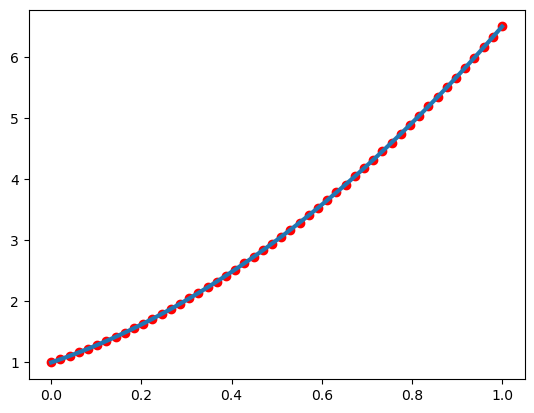

In [21]:
plt.plot(x, t, "ro")
x_test = np.linspace(0, 1, 100)
f_test = w_new[0] + w_new[1] * x_test + w_new[2]*x_test**2
plt.plot(x_test, f_test, linewidth=3)

### Can you derive the least square solution for this model?